# Intelligent Systems for Pattern Recognition
Pietro Francaviglia - 586997 - p.francaviglia1@studenti.unipi.it - Master in Computer Science, curriculum AI
## Midterm 1
### Assignment 2
Plot the auto-correlogram of the temperature data in the appliances dataset (i.e. the columns marked as Ti). Make a plot for each of the sensors (try to put 4/5 of them in the same slide in a readable form). For this assignment, it is sufficient to show the plots and discuss any trends that are found from this analysis.

#### The dataset
We were provided a set of temperature values from ten different locations, eight rooms and two outdoor places - near the house and at a weather station. Measurements were taken every 10 minutes and span from early January to late May.

### Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as smt
from sklearn.linear_model import LinearRegression
from jupyterthemes import jtplot

# size of all figures in the notebook
jtplot.style(figsize=(30,15))

In [2]:
# import and show raw data
csv_filename = "energydata_complete.csv"

data = pd.read_csv(csv_filename)
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


#### Compute metrics

In [3]:
# room names
rooms = [
    "kitchen",
    "living_room",
    "laundry_room",
    "office",
    "bathroom",
    "out_north",
    "ironing_room",
    "teen_room",
    "parents_room",
    "reference"
]

# array of column names in raw data
columns = ["T" + str(i+1) if i != 9 else "T_out" for i in range(len(rooms))]

# autocorrelation was calculated up to a lag of one month
lags = 6*24*28

autocorr = []
oscillations = []
for i in range(len(rooms)):
    # compute autocorrelation
    autocorr.append(smt.acf(data[columns[i]], nlags=lags))
    
    #compute oscillations
    osc = []
    for j in range(1,len(data[columns[i]])):
        osc.append(abs(data[columns[i]][j] - data[columns[i]][j-1]).astype(float))
    
    oscillations.append(osc)

#### Show data

In [4]:
stats_and_plots = zip(rooms, oscillations, columns, autocorr)
# sort rooms by average temperature, lowest to highest
zipped_list = sorted(stats_and_plots, key=lambda x:np.mean(data[x[2]]))

In [5]:
# create and show dataframe with some statistical measures
data_list = []
data_columns = [
    "Dataset",
    "Avg. temp.",
    "Min. temp.",
    "Max. temp.",
    "St. dev. temp. ",
    "Median temp.",
    "5th % temp.",
    "95th % temp.",
    "Avg. osc.",
    "St. dev. osc.",
    "Median osc.",
    "95th % osc."    
]

for z in zipped_list:
    d = sorted(data[z[2]])
    v = sorted(z[1])
        
    data_list.append([
        z[0],
        '{:.2f}'.format(np.mean(d)),
        '{:.2f}'.format(min(d)),
        '{:.2f}'.format(max(d)),
        '{:.2f}'.format(np.std(d)),
        '{:.2f}'.format(d[int(len(d)/2)]),
        '{:.2f}'.format(d[int(0.05*len(d))]),
        '{:.2f}'.format(d[int(0.95*len(d))]),
        '{:.4f}'.format(np.mean(v)),
        '{:.4f}'.format(np.std(v)),
        '{:.4f}'.format(v[int(len(v)/2)]),
        '{:.4f}'.format(v[int(0.95*len(v))])
    ])

pd.DataFrame(data_list, columns=data_columns)

,Dataset,Avg. temp.,Min. temp.,Max. temp.,St. dev. temp.,Median temp.,5th % temp.,95th % temp.,Avg. osc.,St. dev. osc.,Median osc.,95th % osc.
0,reference,7.41,-5.00,26.10,5.32,6.92,-0.30,17.10,0.1147,0.1072,0.0833,0.3333
1,out_north,7.91,-6.07,28.29,6.09,7.30,-0.67,19.55,0.1597,0.1787,0.1100,0.4733
2,parents_room,19.49,14.89,24.50,2.01,19.39,16.39,23.20,0.0172,0.0402,0.0000,0.0733
3,bathroom,19.59,15.33,25.80,1.84,19.39,17.10,23.39,0.0384,0.1171,0.0000,0.1256
4,ironing_room,20.27,15.39,26.00,2.11,20.03,17.01,24.08,0.0229,0.0370,0.0000,0.0986
5,living_room,20.34,16.10,29.86,2.19,20.00,17.32,24.56,0.0539,0.0813,0.0333,0.1483
6,office,20.86,15.10,26.20,2.04,20.67,17.79,24.50,0.0359,0.0711,0.0000,0.1100
7,kitchen,21.69,16.79,26.26,1.61,21.60,19.10,24.73,0.0292,0.0391,0.0000,0.1000
8,teen_room,22.03,16.31,27.23,1.96,22.10,18.36,25.10,0.0323,0.0381,0.0200,0.1000
9,laundry_room,22.27,17.20,29.24,2.01,22.10,19.50,26.20,0.0352,0.0579,0.0000,0.1333


reference


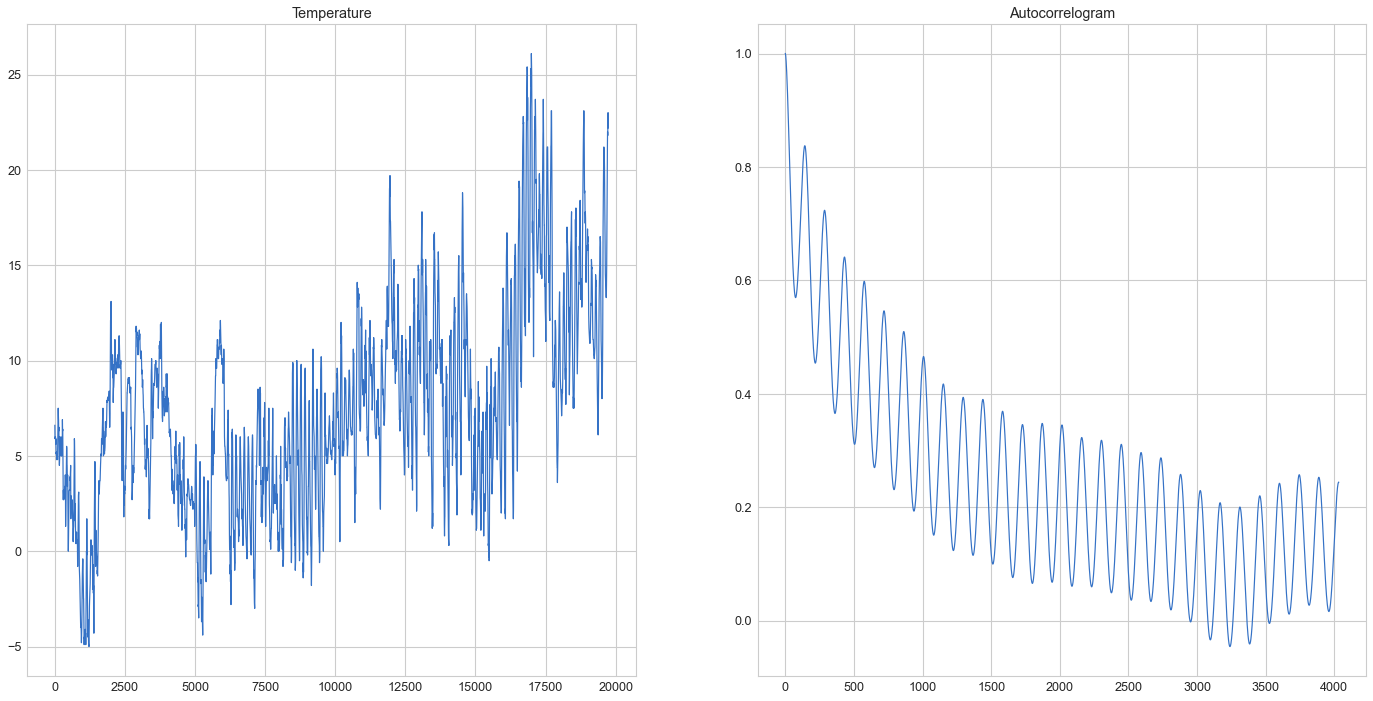


out_north


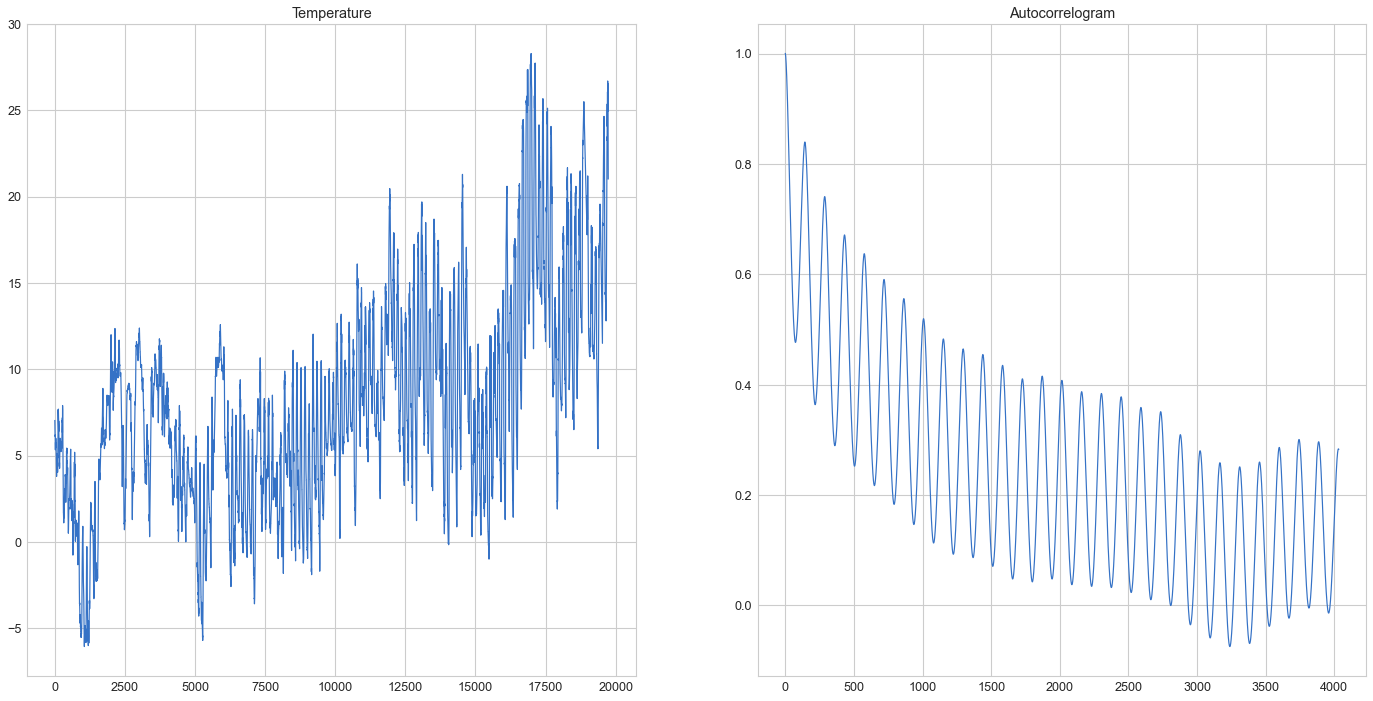


parents_room


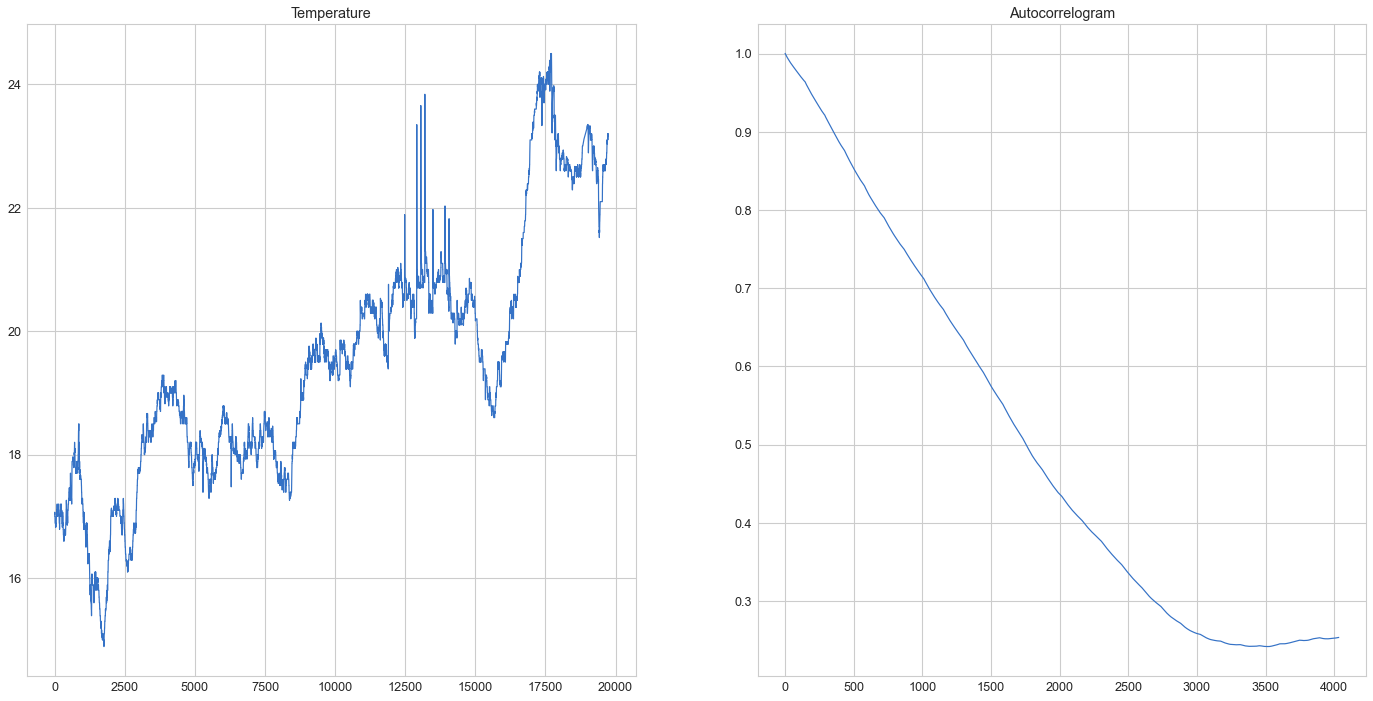


bathroom


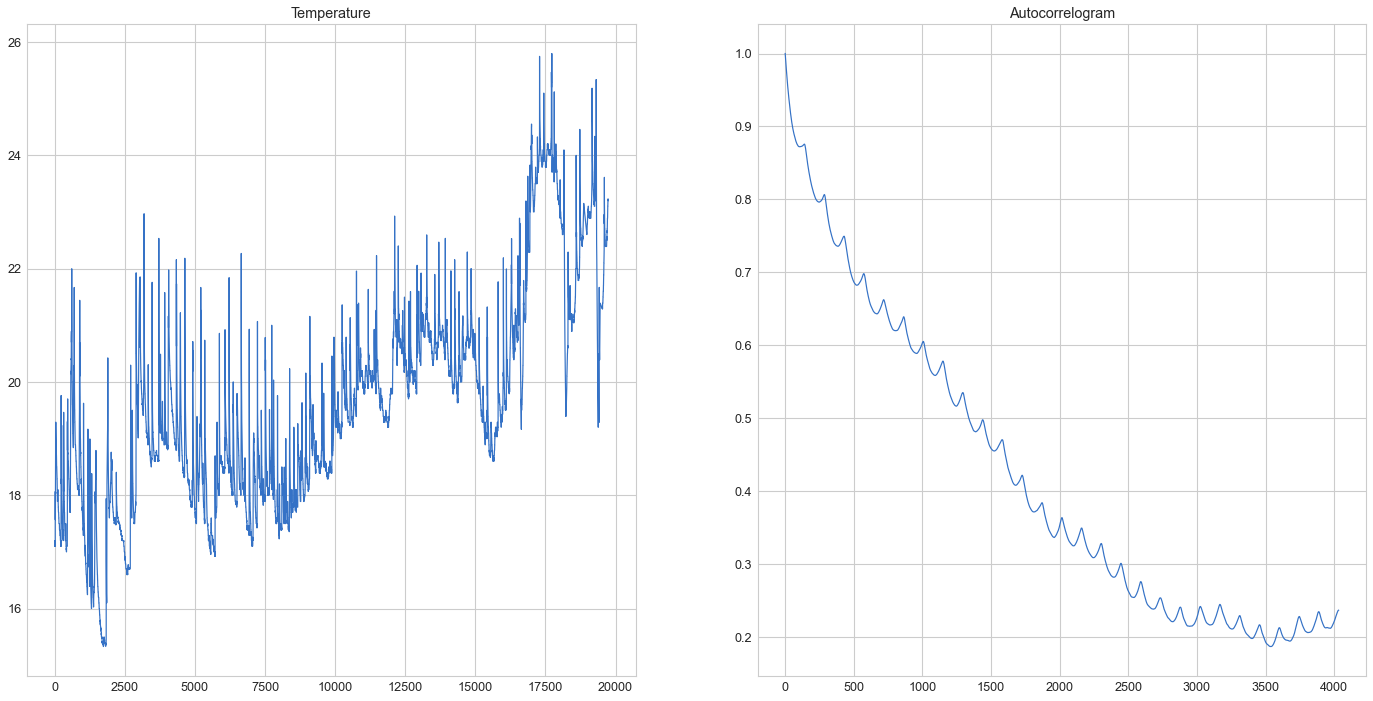


ironing_room


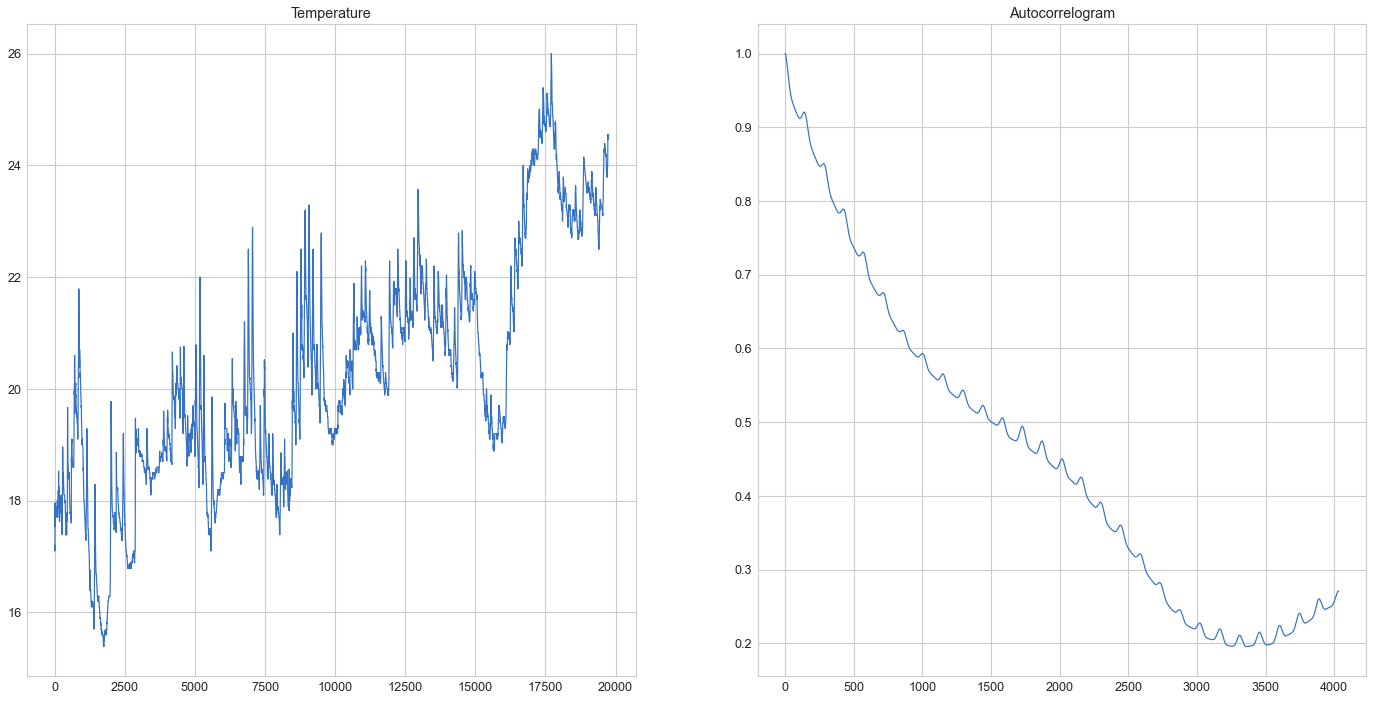


living_room


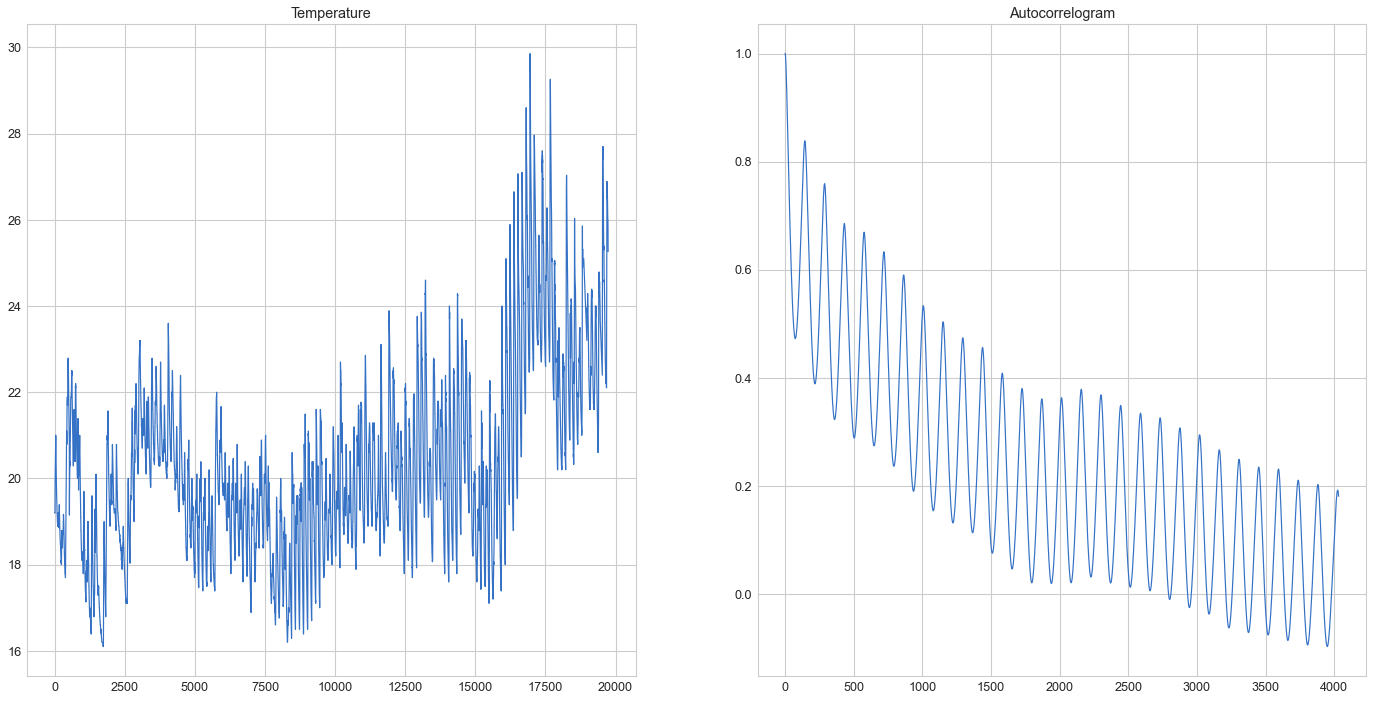


office


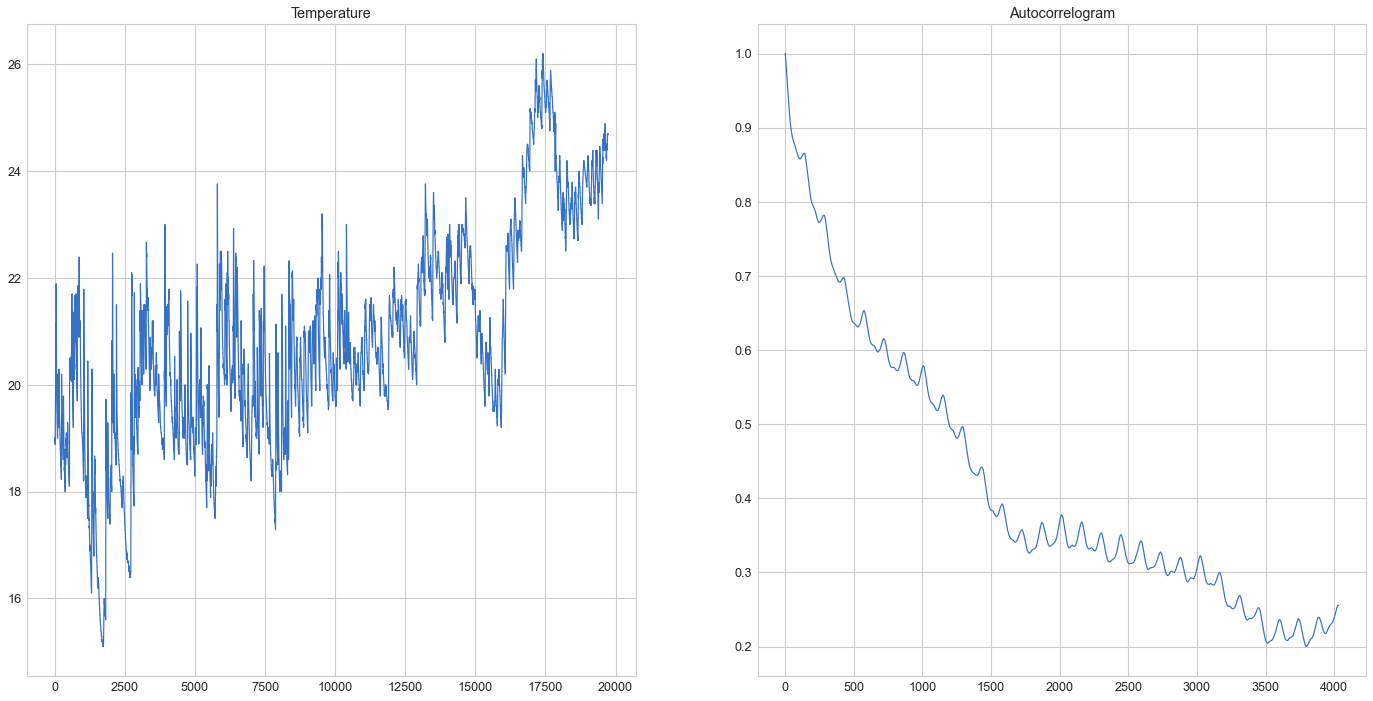


kitchen


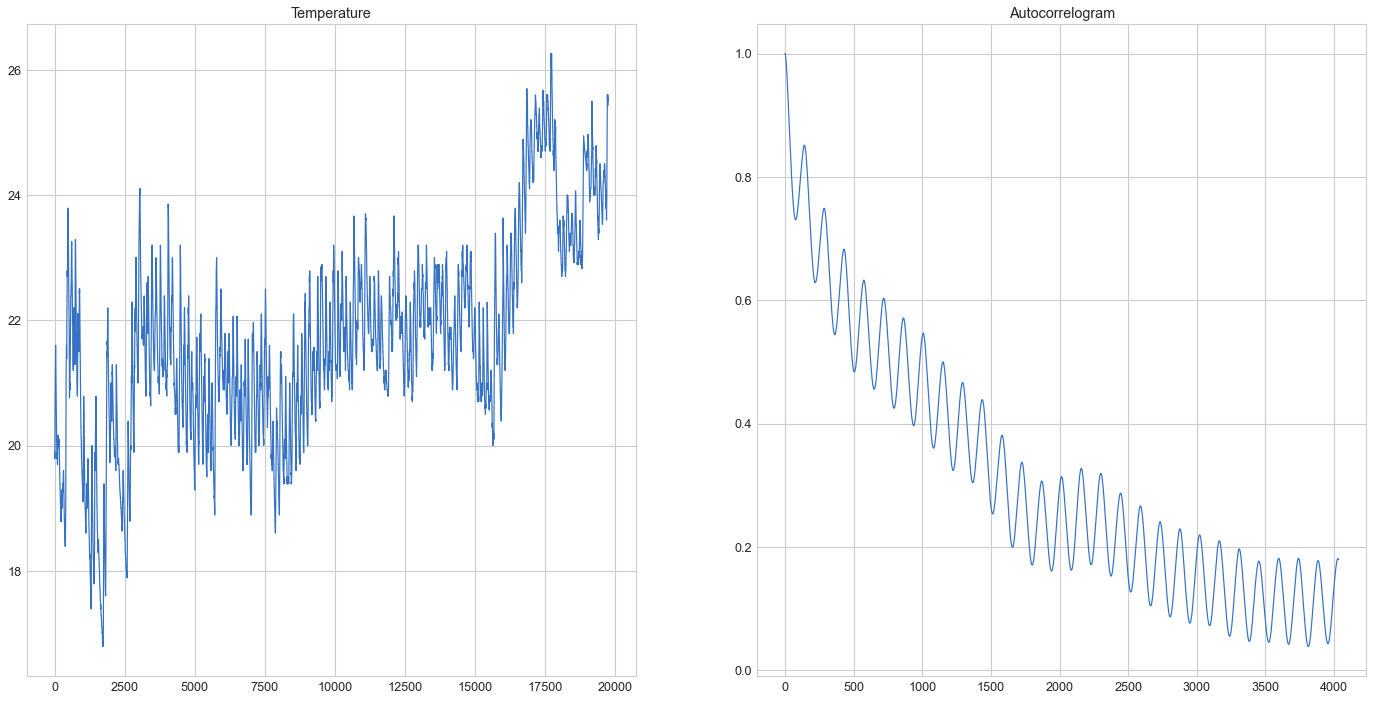


teen_room


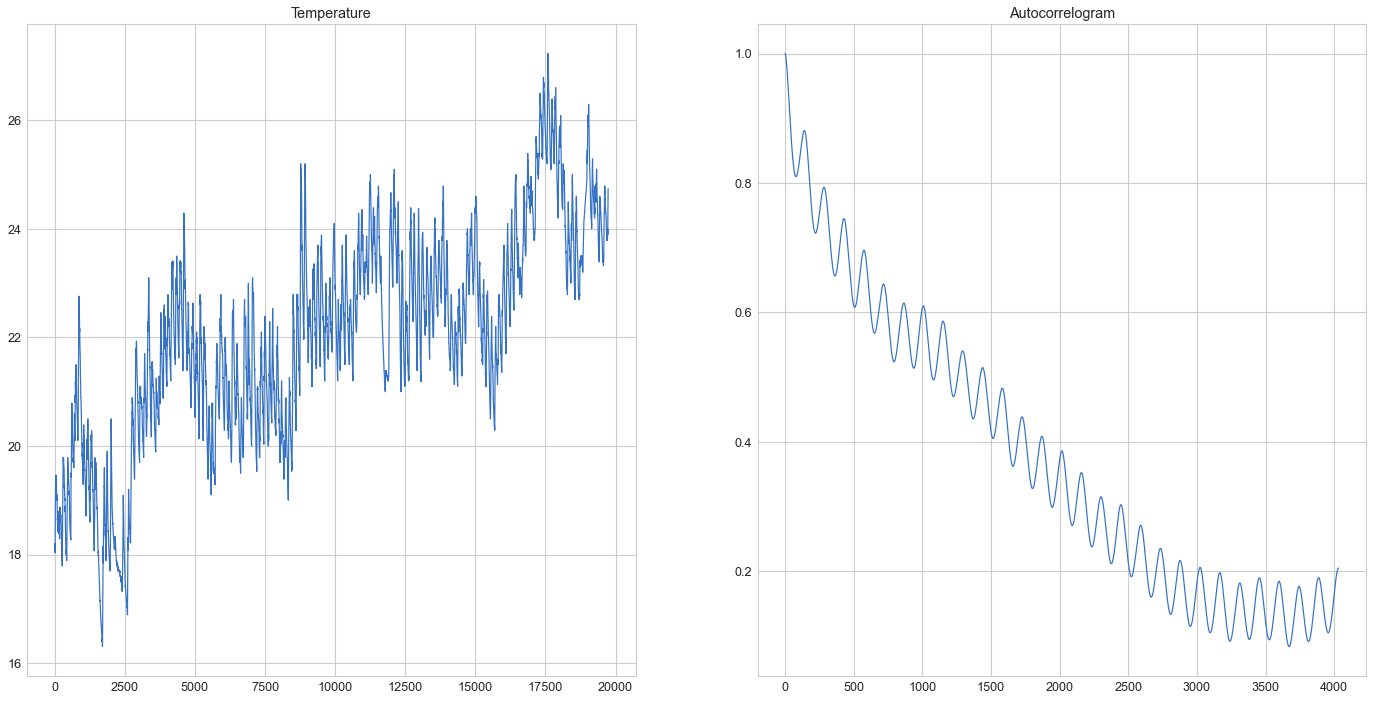


laundry_room


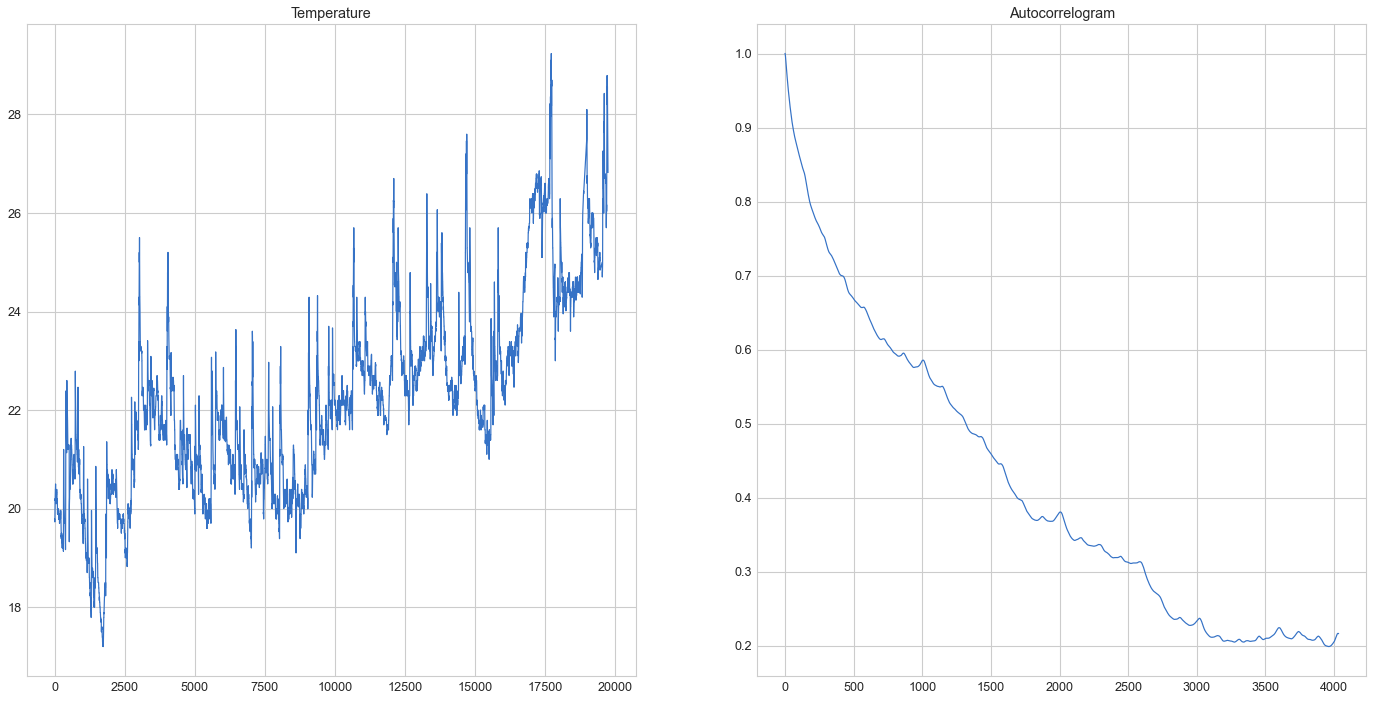

In [6]:
# print temperature and autocorrelation plot
for a in zipped_list:
    print(a[0])
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(data[a[2]])
    ax1.set_title("Temperature")
    ax2.plot(a[3])
    ax2.set_title("Autocorrelogram")
    plt.show(fig)
    
    print()

#### Compare peaks

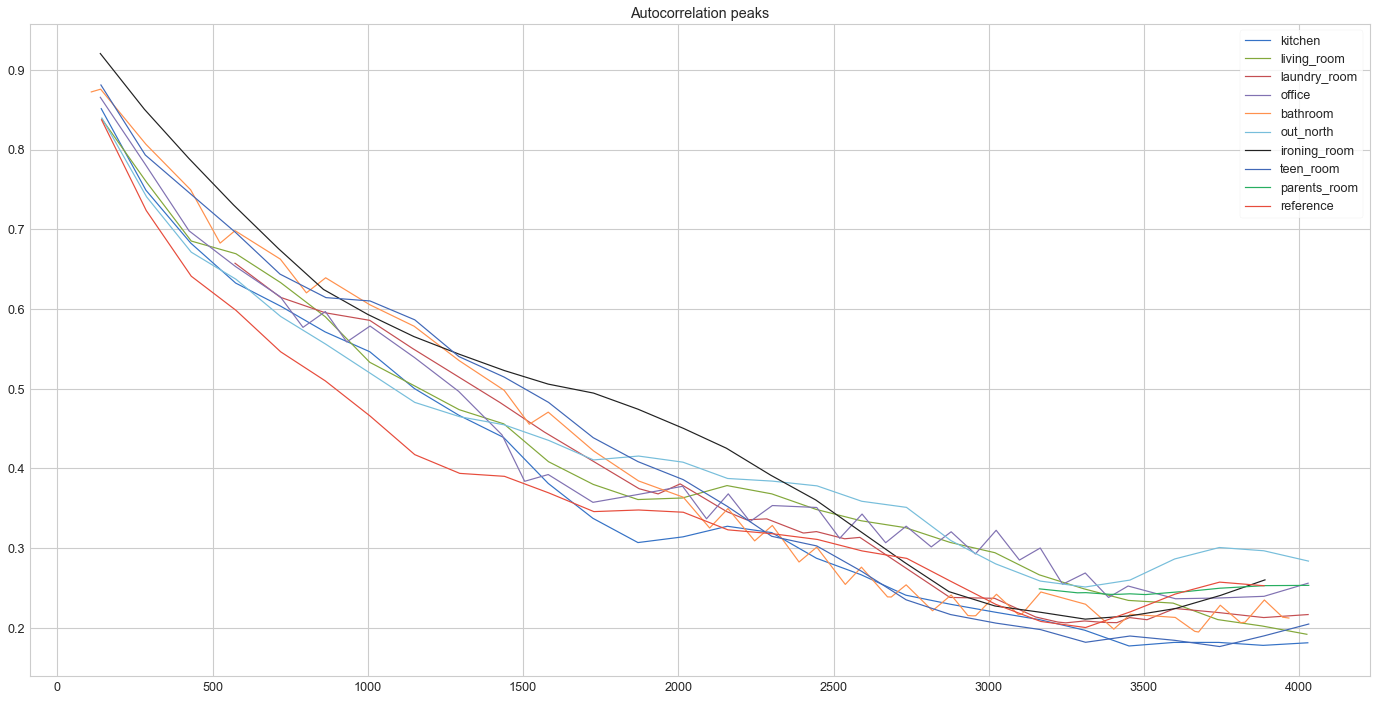

In [7]:
# create and show tanget to local maxima of autocorrelation plots
max_peaks = []
max_indexes = []

for i in range(len(autocorr)):
    max_peak_values = []
    max_index_values = []
    
    for j in range(1, len(autocorr[i])-1):
        if autocorr[i][j] > autocorr[i][j-1] and autocorr[i][j] > autocorr[i][j+1]:
            max_index_values.append(j)
            max_peak_values.append(autocorr[i][j])
    
    max_peaks.append(max_peak_values)
    max_indexes.append(max_index_values)

for arr in zip(max_indexes, max_peaks, rooms):
    fig = plt.plot(arr[0], arr[1], label=arr[2])
    plt.legend()
    plt.title("Autocorrelation peaks")

plt.show(fig)

#### Understand impact of linear trend

reference


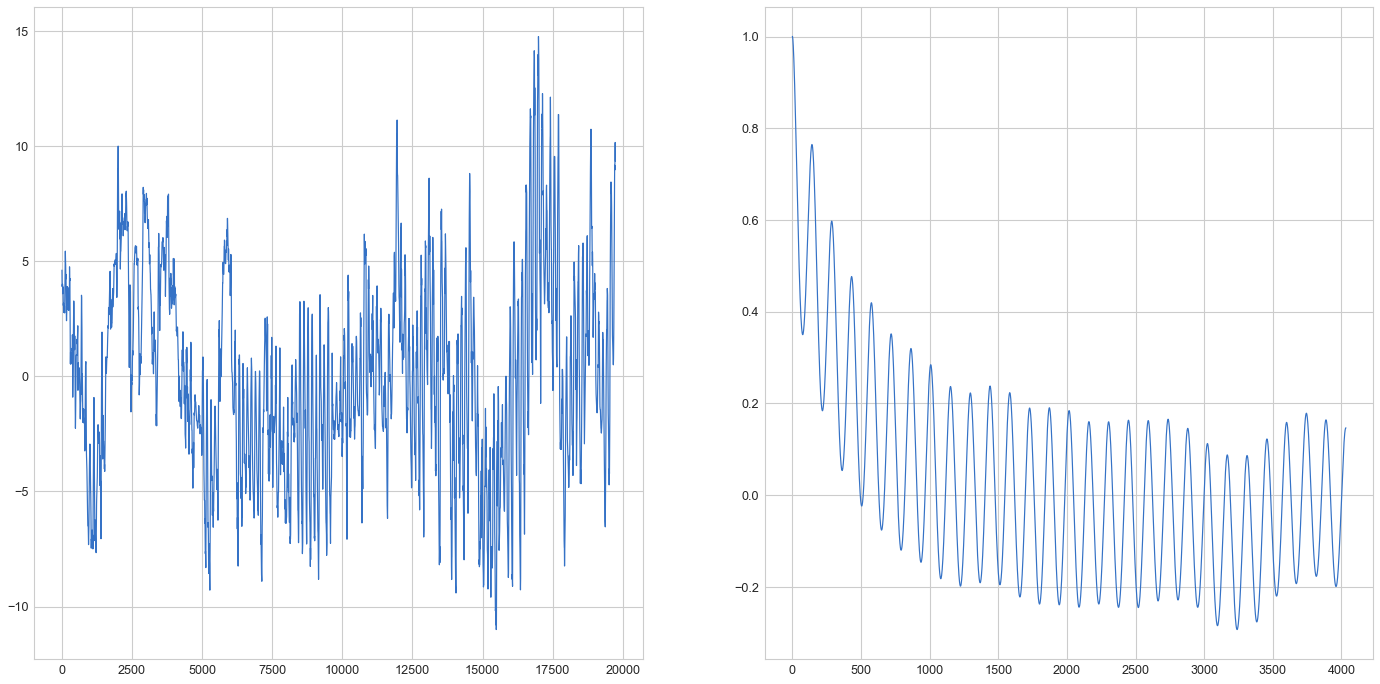

out_north


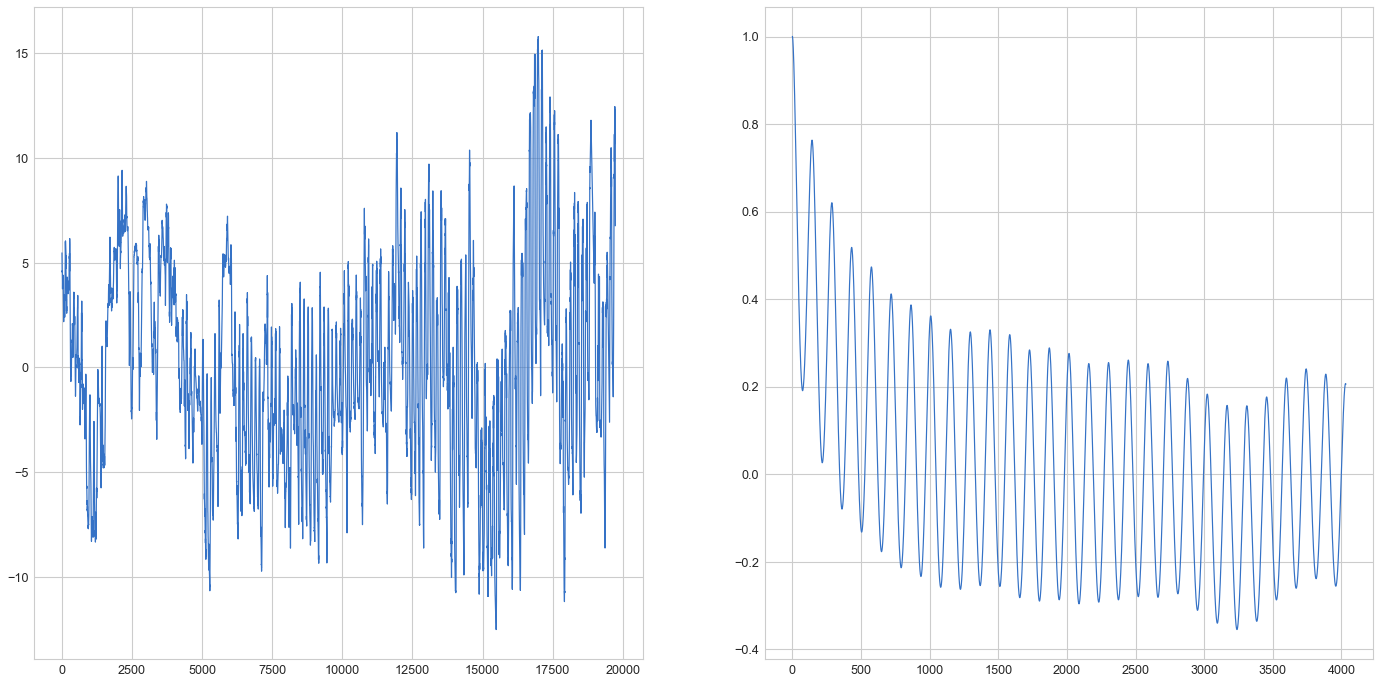

parents_room


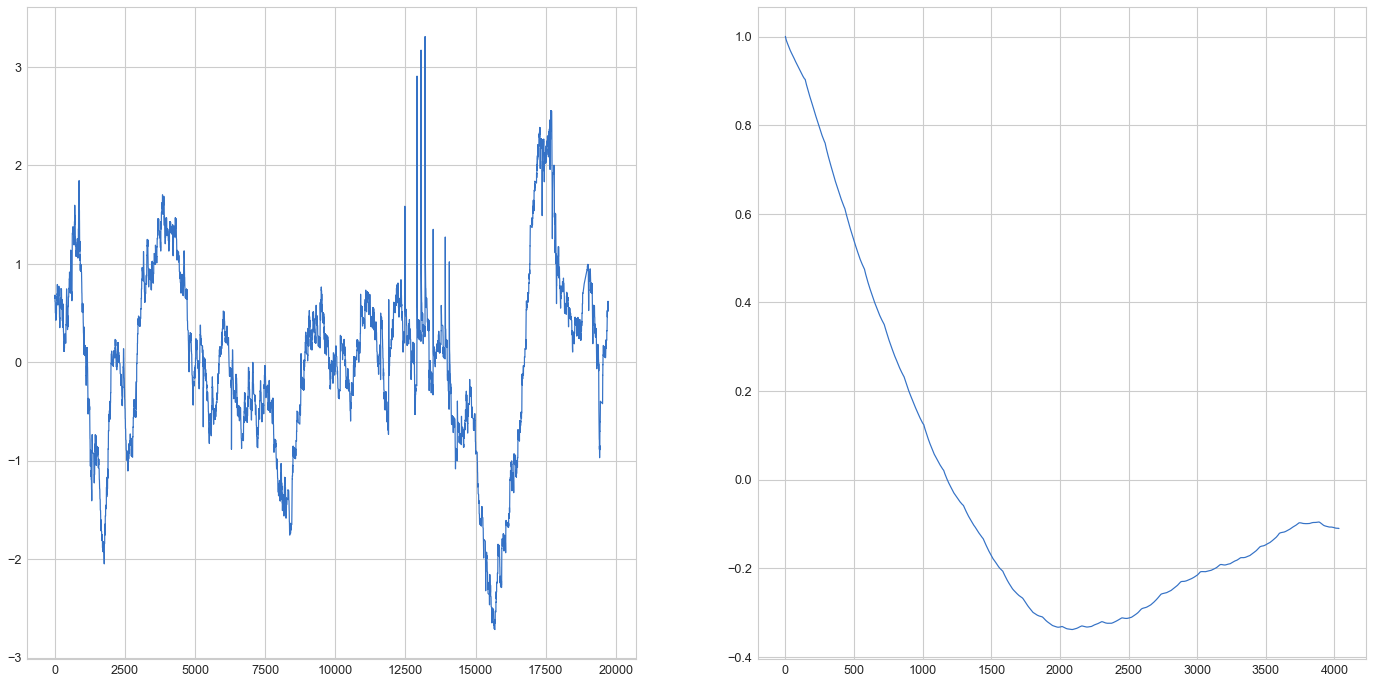

bathroom


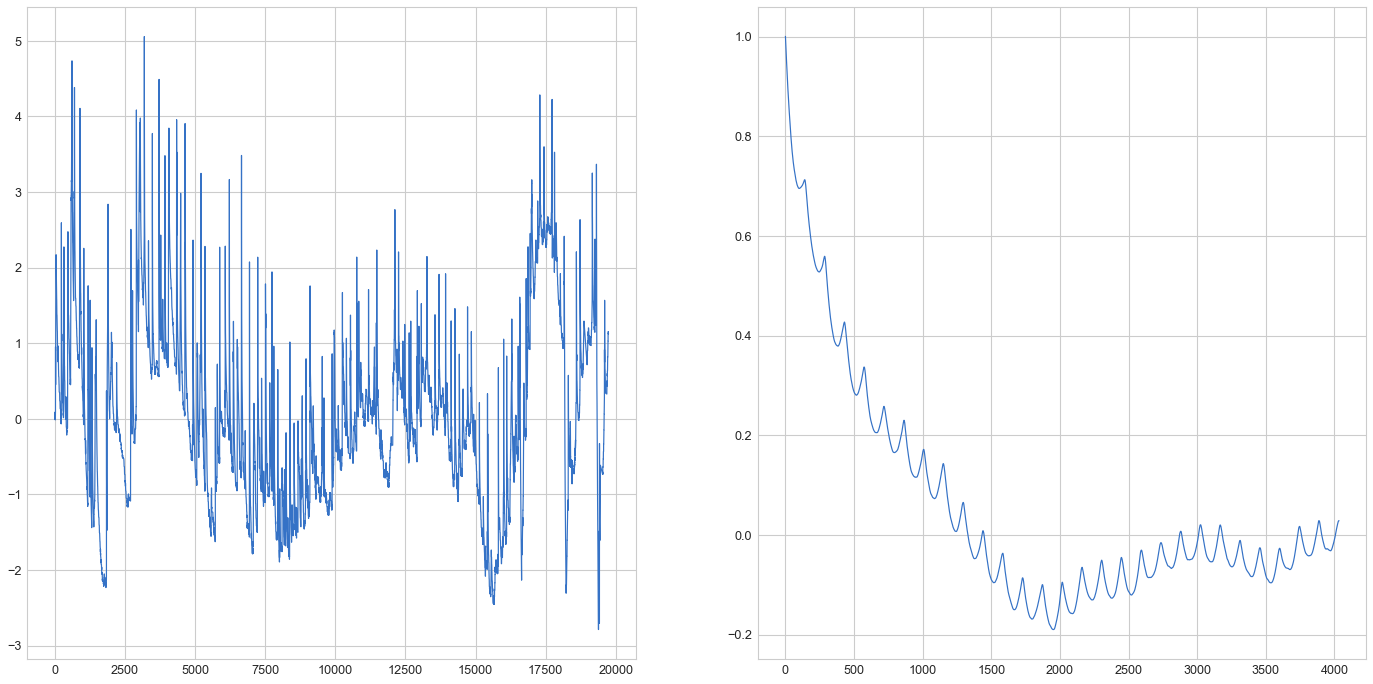

ironing_room


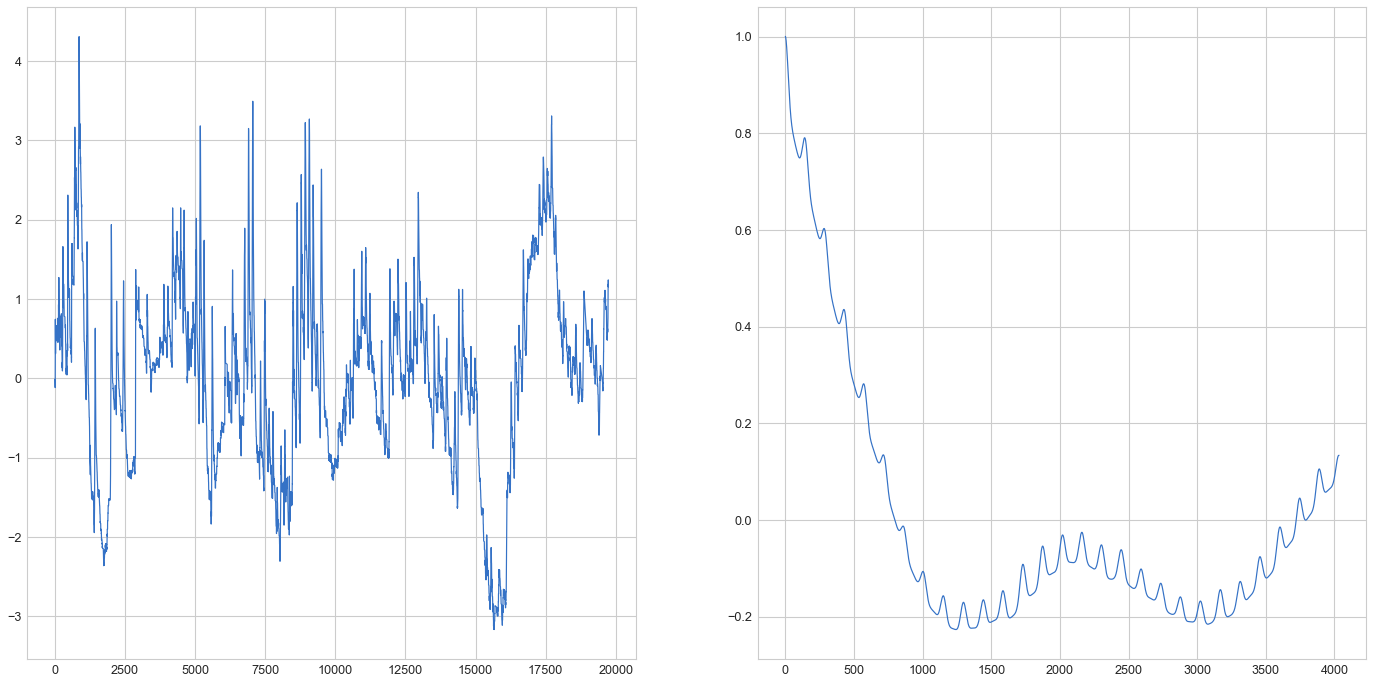

living_room


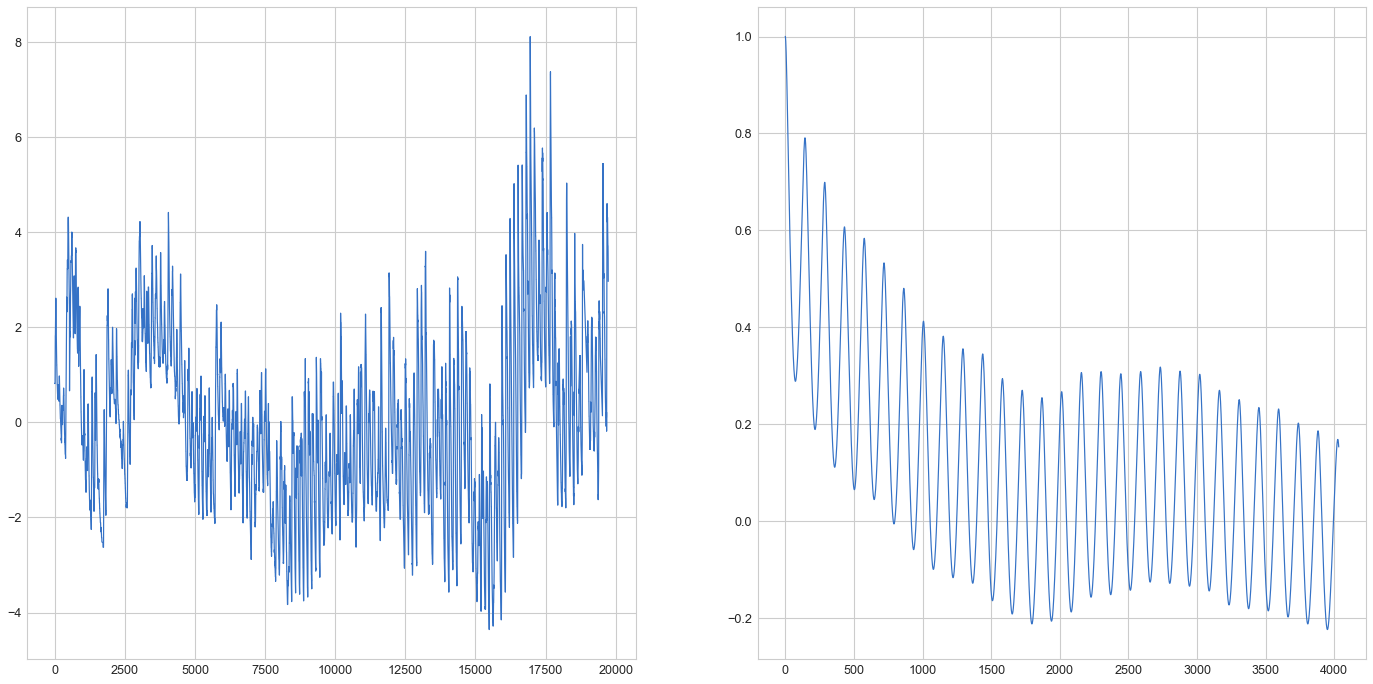

office


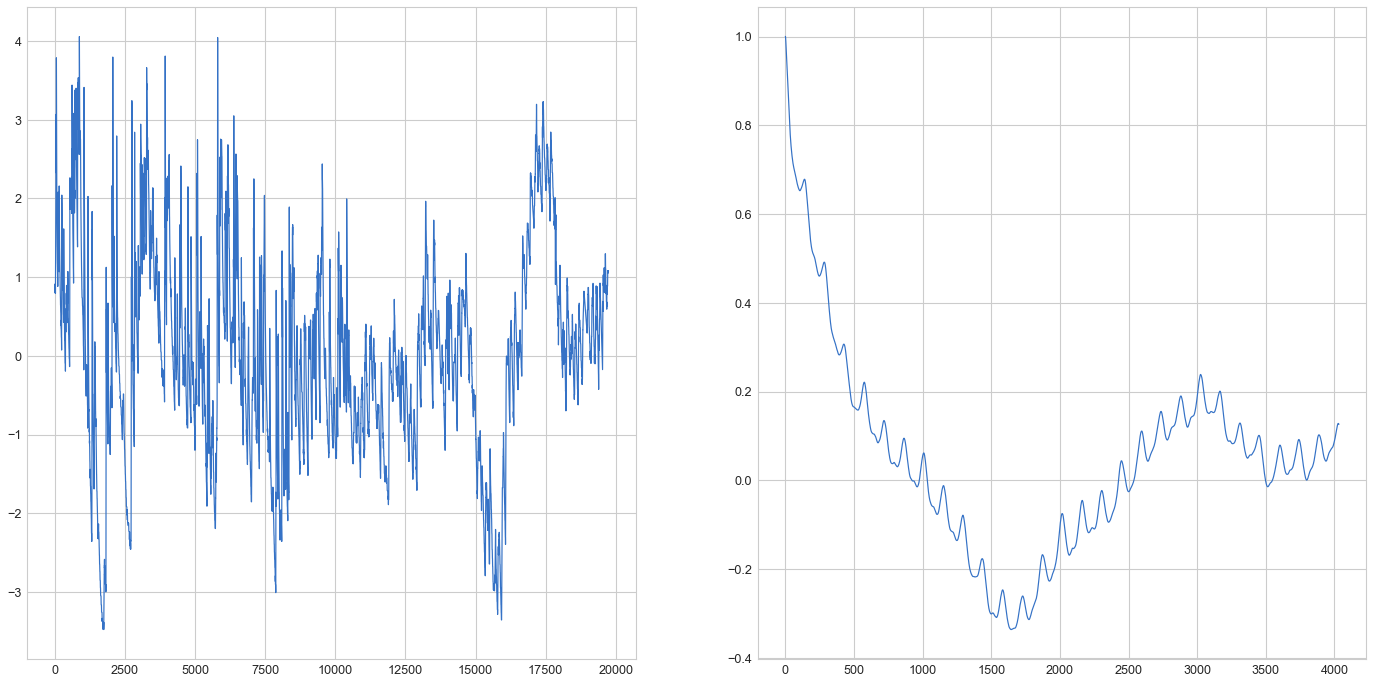

kitchen


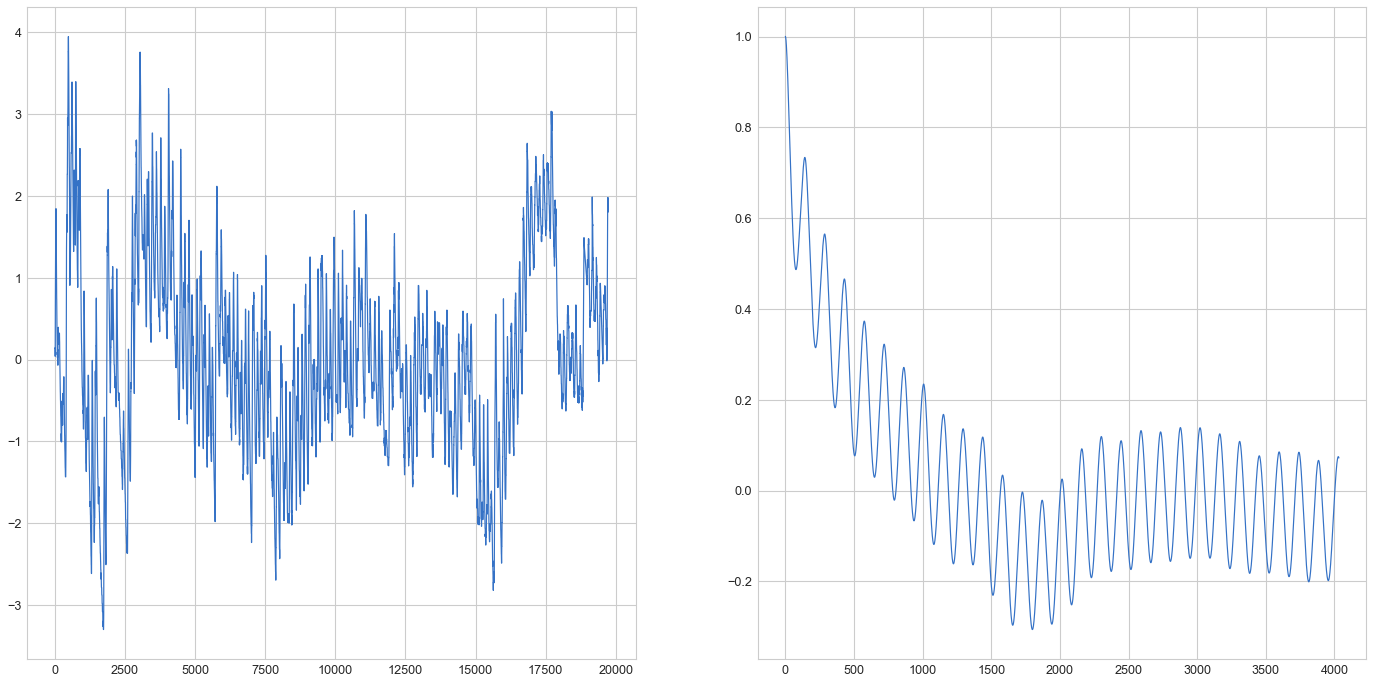

teen_room


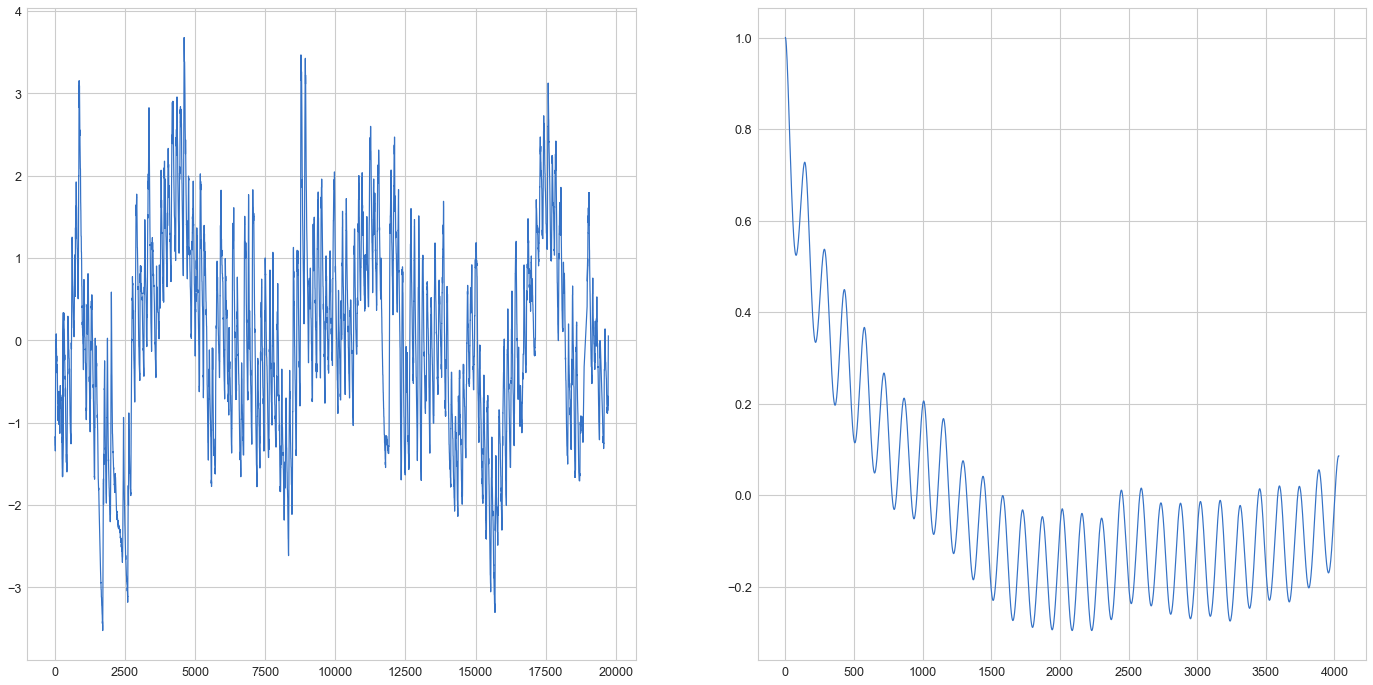

laundry_room


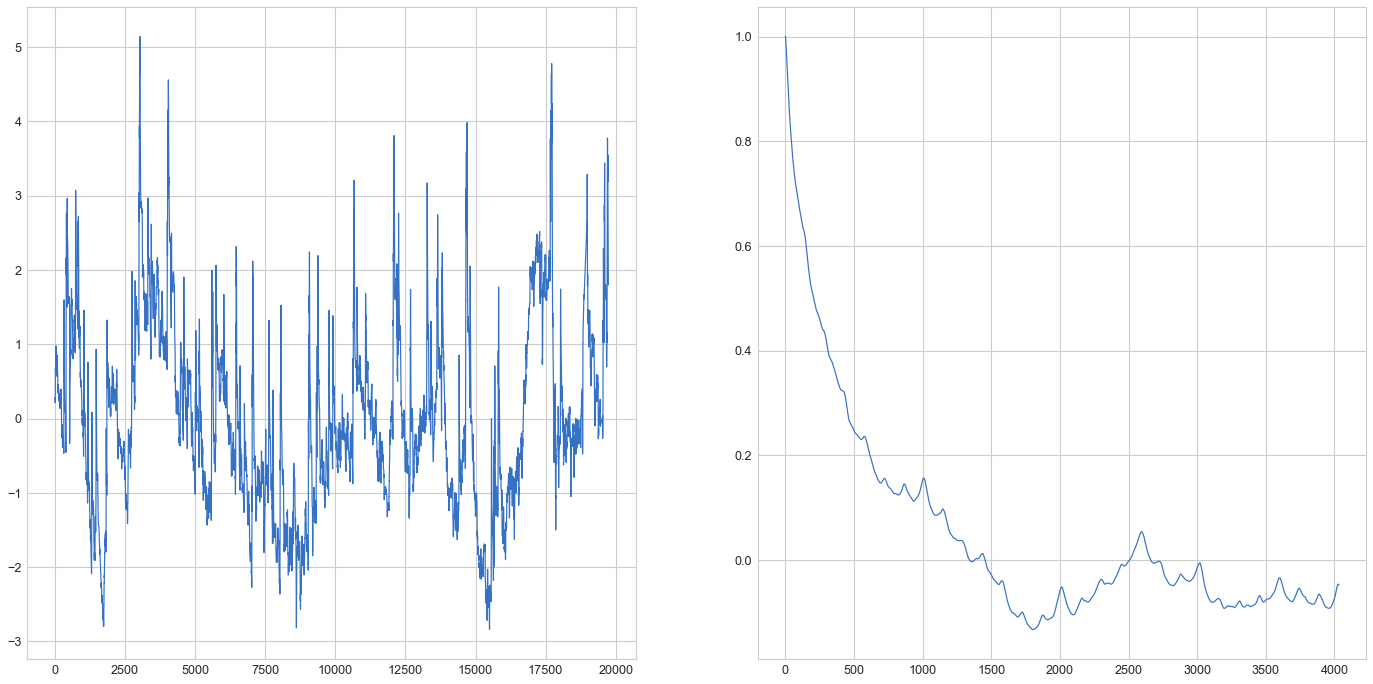

In [8]:
# remove linear trend from temperature data and plot new stuff
for z in zipped_list:
    model = LinearRegression()
    X = [i for i in range(len(data[z[2]]))]
    X = np.reshape(X, (len(X), 1))
    model.fit(X, data[z[2]])
    trend = model.predict(X)
    dv = [data[z[2]][i] - trend[i] for i in range(len(trend))]
    
    print(z[0])
    fig, (ax1, ax2) = plt.subplots(1,2)
    ax1.plot(dv)
    ax2.plot(smt.acf(dv, nlags=lags))
    plt.show(fig)

### Observations

#### Comparisons
There is obviously a huge difference between the average outside and inside temperature during the winter and most of the spring. The gap is not only in the average temperature (7°C vs 21°C), but also in the standard deviation (3x higher for outside measurements) and in the average 10 minutes oscillation (4x higher).

I could not find any meaningful variation between the two outside datasets, while for the rooms we can identify some slight differences worth pointing out.
First, the average temperature is not equal in all eight rooms: it ranges from about 19.5°C in the parents room to over 22°C in both the teen room and the laundry room. The kitchen and the laundry room do not experience low tempreatures with respect to the other rooms, with their 5th percentile being higher by a strong margin.

Six out of eight rooms have a null median oscillation, meaning that at least half of the time the temperature does not change in a 10 minutes span. The only indoor places where this does not happen are the living room (0.033°C) and the teen room (0.02°C), well below the outdoor values of 0.083°C near the hose and 0.11°C at the weather station.

#### Auto-correlograms
Almost every autocorrelogram shows a 24-hour periodicity, meaning that temperatures tend to be similar at the same time during each day. In the last plot, I compare the tanget to the maxima of the autocorrelation plot for each room, and the trend is actually very consistent, decreasing to 0.4 in two weeks and then flattening at 0.25 for each dataset.

The main difference among these plots is the amplitude of the wave: we range from some straighty lines (parents room, laundry room) to massive oscillations (outdoor measurements, living room). This could be caused by a multitude of factors, the main one being daily rotuine. Indeed, rooms with lower amplitude are the ones either with a tighter temperature control (parent room, laundry room, office, ironing room), whilst living room and kitchen are more subject to changes with an exact period of 24 hours, due to meal preparation or habits. Moreover, indoor places are heated, but some heaters may be turned off at times because some rooms do not need constant temperature (e.g. living room), or temperatures may rise if there is something hot inside, like the cookers in the kitchen or the washing machine/dryer in the laundry room.

I wanted to have a better look at the periodicity of the temperature variations. In order to enforce some kind of stationarity, I removed the linear trend related to the change of the seasons and I computed again the autocorrelation for every room. I got lower values across all data, and oscillation-wise great amplitudes got greater, small got smaller. These plots confirm and highlight my previous considerations.

#### Room-by-room comment
##### Outdoor
Temperatures are slightly higher near the house, probably because of domestic heat influencing measurements.
Both sets show relevant 10 minutes oscillations, with their 95th percentile being a third of a Celsius degree at the weather station and almost half a degree near the house. Autocorrelograms show a strong 24-hour periodicity, and we should expect that from places without any temperature control.
##### Parents room
It is the room with the lowest temperatures, the least 10 minutes variations (95th percentile is below a tenth of a degree) and the smallest periodicity, as shown by the plots. The reason for this behavior may be less heating during the day, as the room should be empty, and a constant temperature at night while sleeping, so variations depend more on random factors than on the hour of the day. 
##### Bathroom
The most relevant thing is the standard deviation of the temperature oscillation, even higher than the reference one. This may be caused by the fact that the bathroom is heated if and only if it is used, so there is a very low periodicity and a null median oscillation, because for the most part of the day that room is empty, but there are short bursts of heat here and there.
##### Ironing room and laundry room
I don't think I understood what an ironing room really is, especially because there is also a laundry room where the washing machine and the dryer, if any, should be, because erecting 4 walls around an ironing table honestly sounds like a waste of indoor space. Nonetheless, we can make the same considerations for both these rooms: absence of daily periodicity and low oscillations, with temperature variations caused by factors other than the hour of the day, i.e. when the machines are on.
##### Living room
This rooms yielded the most routine-based results, as autocorrelograms emphasize, mainly because of the purpose itself of the room: crowded during the day (and dutifully heated) and empty at night, so it does not come as a surprise that the standard deviation for temperature is the highest among all indoor places. Statistics about temperature oscillations highlight the need for fast changes: again, both median oscillation and its 95th percentile are the highest for every room.
##### Office
I expected similarities with living room data, but the periodicity is much lower compared to that, maybe because this room is used whenever parents are not busy with kids or household duties, so 24-hour periodicity may be lowered.
##### Kitchen
This room is used with a precise routine, so 24-hour periodicity is clearly visible in the autocorrelation plots and rightfully so. All statistics about temperature are above average, because more often than not this is a small room with open flames inside, paired with heating from the fridge, the freezer and other appliances.
##### Teen room
One could expect similar trends with respect to the parents room ,given the fact that they are both bedrooms, but teens go to school and tend to stay more in their rooms, and data about this particular case support my theory: this is indeed the simplest explanation for the presence of a sinusoidal component in the autocorrelation plots. This room is also the second hottest room in the house, maybe because teens prefer to stay warm and lightly dressed even during winter, and do not understand or care about the cost of heating, so they use it at max power and want the temperature to be exactly what they want. This also explains why it is only one of two rooms with a non-null median temperature oscillation.

### Further considerations
#### Statistical metrics
I could have compared day and night measurements and come up with sharper observations about the routine of the house, but I thought the information added with that kind of analysis was not worth the effort required to do it. I could also exploit advanced statistical tools, but, again, I felt like my considerations about how people usually behave in a house would have made whatever data-driven conclusion just a confirmation of something previously said, or something I could not explain in a logical way, and that would have been even worse because I would have looked like a fool.
#### Autocorrelation
I could have performed a month-by-month analysis and compared them, but there would have been very few useful information from that kind of calculations. I thought about applying Fourier on the data I was given, but that was more of a confusion source than a help, and I could not justify in any meaningful way that domain change, so I desisted.
#### In the end
I don't really know if this is enough or if I centered the point of this assignment, but I hope so and I would gladly accept corrections and suggestions. I had fun trying to extract senseful sentences from that dataset, and I look forward to performing the next ones.